In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px


#### Loading the data 

The function takes in a csv or an excel file and returns a dataframe.if the file type is not specified,it prints a file type not supported

In [2]:
def wrangle_data(file_path):
    
    if 'csv' in file_path:
        df = pd.read_csv(file_path)
    elif 'xlsx' in file_path or 'xls' in file_path:
        df = pd.read_excel(file_path)
    else:
        print("File type not supported.")
        return None
    return df


In [3]:
file_path="Global_Cybersecurity_Threats_2015-2024.csv"
df=wrangle_data(file_path)

In [4]:
#checking for general information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Country                              3000 non-null   object 
 1   Year                                 3000 non-null   int64  
 2   Attack Type                          3000 non-null   object 
 3   Target Industry                      3000 non-null   object 
 4   Financial Loss (in Million $)        3000 non-null   float64
 5   Number of Affected Users             3000 non-null   int64  
 6   Attack Source                        3000 non-null   object 
 7   Security Vulnerability Type          3000 non-null   object 
 8   Defense Mechanism Used               3000 non-null   object 
 9   Incident Resolution Time (in Hours)  3000 non-null   int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 234.5+ KB


In [13]:
df.head()

,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours)
0,China,2019,Phishing,Education,80.53,773169,Hacker Group,Unpatched Software,VPN,63
1,China,2019,Ransomware,Retail,62.19,295961,Hacker Group,Unpatched Software,Firewall,71
2,India,2017,Man-in-the-Middle,IT,38.65,605895,Hacker Group,Weak Passwords,VPN,20
3,UK,2024,Ransomware,Telecommunications,41.44,659320,Nation-state,Social Engineering,AI-based Detection,7
4,Germany,2018,Man-in-the-Middle,IT,74.41,810682,Insider,Social Engineering,VPN,68


The data frame contains a total of ten columns with 3000 entries.There are no missing values in the dataset.The columns are of the data types float(1),integers(3) and lastsly object type are 6.

Checking the dataframe columns

In [5]:
print(f"The dataframe is made up of the following columns:{df.columns}")

The dataframe is made up of the following columns:Index(['Country', 'Year', 'Attack Type', 'Target Industry',
       'Financial Loss (in Million $)', 'Number of Affected Users',
       'Attack Source', 'Security Vulnerability Type',
       'Defense Mechanism Used', 'Incident Resolution Time (in Hours)'],
      dtype='object')


In [6]:
#checking for the general statistical summary of the dataset
df.describe()

,Year,Financial Loss (in Million $),Number of Affected Users,Incident Resolution Time (in Hours)
count,3000.000000,3000.000000,3000.000000,3000.000000
mean,2019.570333,50.492970,504684.136333,36.476000
std,2.857932,28.791415,289944.084972,20.570768
min,2015.000000,0.500000,424.000000,1.000000
25%,2017.000000,25.757500,255805.250000,19.000000
50%,2020.000000,50.795000,504513.000000,37.000000
75%,2022.000000,75.630000,758088.500000,55.000000
max,2024.000000,99.990000,999635.000000,72.000000


In [7]:
#checking for missing values
df.isna().sum()

Country                                0
Year                                   0
Attack Type                            0
Target Industry                        0
Financial Loss (in Million $)          0
Number of Affected Users               0
Attack Source                          0
Security Vulnerability Type            0
Defense Mechanism Used                 0
Incident Resolution Time (in Hours)    0
dtype: int64

There are no missing  values in the dataset

### Exploratory data analysis

#### Univariate Analysis

##### what is the distribution of attacks over the years

In [8]:
df['Year'].value_counts()

2017    319
2022    318
2023    315
2020    315
2018    310
2021    299
2024    299
2016    285
2015    277
2019    263
Name: Year, dtype: int64

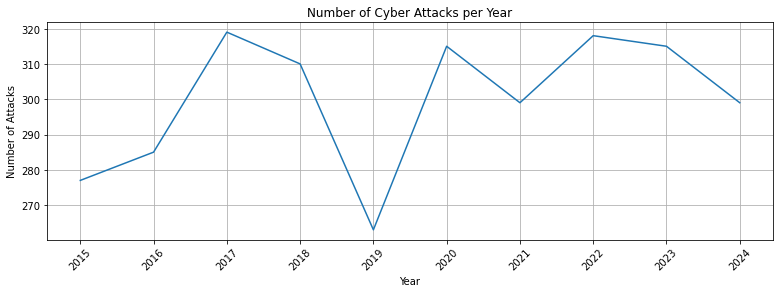

In [12]:
#plot showing the distribution of attacks over the years.
year_counts = df['Year'].value_counts().sort_index()
plt.figure(figsize=(13,4))
year_counts.plot()
plt.title('Number of Cyber Attacks per Year')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.grid(True)
plt.xticks(ticks=year_counts.index, rotation=45)
plt.show()


The year 2017 witnessed the highest number of attacks at 319.The year 2019 witnessed a sharp decline in the number  attacks followed by a rapid  increase in attacks in the year 2020.The year 2019 is known for the covid 19 pandemic.As a result of the pandemic,several businesses were shut down.This could have contributed to the sharp decline in the number of cyber attacks.This leads to the question which sectors were highly affected by cyber attacks?.The number of attacks steadily declined from the year 2023 to 2024.

#### Attacks by target industry

The  first part of the analysis focuses on the overall sectors that experienced cyber attacks.We will theN narrow down to the years that saw tha highest and lowest number of cyber attacks.

In [40]:
#create a histogram for the target industries
Target_Industries=df["Target Industry"].value_counts()
Target_Industries

IT                    478
Banking               445
Healthcare            429
Retail                423
Education             419
Telecommunications    403
Government            403
Name: Target Industry, dtype: int64

The IT industry witnessed the highest number of attacks over the years at 478 attacks followed closely by the banking sector at 445 and healthcare at 429.The telecommunication and government bottled however, at  403 attacks each.

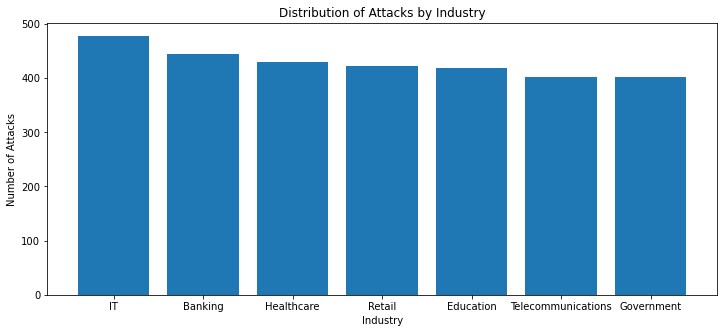

In [51]:
#Plot showing the distribution of attacks over the years
fig, ax = plt.subplots(figsize=(12, 5))
ax.bar(Target_Industries.index, Target_Industries.values)
# Adding the  labels and title
ax.set_xlabel("Industry")
ax.set_ylabel("Number of Attacks")
ax.set_title("Distribution of Attacks by Industry")
plt.show()


Despite the IT sector experiencing the highest number of attacks,the attacks seem to be uniformly distributed across the observed sectors.

#### Distribution of attacks based on the type of attack

In [26]:
Attack_types=df["Attack Type"].value_counts(normalize=True)*100
Attack_types

DDoS                 17.700000
Phishing             17.633333
SQL Injection        16.766667
Ransomware           16.433333
Malware              16.166667
Man-in-the-Middle    15.300000
Name: Attack Type, dtype: float64

In [46]:
#plotting the distribution of cyber attacks based on the type of attack
fig=px.bar(
    data_frame=Attack_types.sort_values(),
    x=Attack_types.values,
    y=Attack_types.index,
    title="Distribution of cyber attacks by type of attack",
    orientation="h"
)
fig.update_layout(
    xaxis_title="Attack Type",
    yaxis_title="Percentage of attacks")
fig.show();

Phising was the most prevalent attack at 17.7%, followed closely by DDos at 17.6%.Man-in-the-middle contributed the least at 15.3%.The plot revealed that the attacks are nearly uniformly distributed with little variation in their frequencies.

#### Bivariate analysis

what were the financial implications  of the attacks?

In [51]:
#grouping the attacks by financial loss
resulting_loss=df.groupby("Attack Type")["Financial Loss (in Million $)"].mean().sort_values(ascending=False)
resulting_loss

Attack Type
DDoS                 52.035631
Man-in-the-Middle    51.309085
Phishing             50.459905
SQL Injection        50.013042
Ransomware           49.653793
Malware              49.418454
Name: Financial Loss (in Million $), dtype: float64

Text(0.5, 1.0, 'Resulting losses from the differents types of cyber attacks')

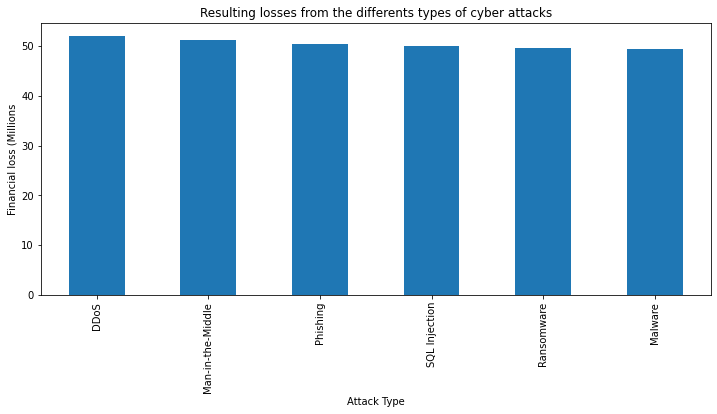

In [59]:
fig, ax = plt.subplots(figsize=(12, 5))
resulting_loss.plot(kind="bar",ax=ax)
plt.ylabel("Financial loss (Millions")
plt.title("Resulting losses from the differents types of cyber attacks")

In [63]:
df["Country"].value_counts(normalize=True)*100

UK           10.700000
Brazil       10.333333
India        10.266667
France       10.166667
Japan        10.166667
Australia     9.900000
Russia        9.833333
Germany       9.700000
USA           9.566667
China         9.366667
Name: Country, dtype: float64